In [3]:
from pathlib import Path
import os
if not str(Path.cwd()).endswith('DaSPi'):
    os.chdir(Path.cwd().parent.resolve())
Path.cwd()

WindowsPath('C:/Users/ch0rjg/Festo/FMT-Product Care Versuch - Documents/Datenwissenschaft/Bibliotheken/DaSPi')

In [4]:
import daspi as dsp
DPI = 120
dsp.STR._username_ = 'j4ggr'
dsp.__version__

'local development version'

In [5]:

import daspi as dsp
fA = dsp.Factor('A', (-1, 1))
fB = dsp.Factor('B', (-1, 1))
fC = dsp.Factor('C', (-1, 1))
builder = dsp.FractionalFactorialDesignBuilder(
    fA, fB, fC, generators=['C=AB'], fold='A', shuffle=False)

df = builder.build_design(corrected=False)

C:\Users\ch0rjg\Festo\FMT-Product Care Versuch - Documents\Datenwissenschaft\Bibliotheken\DaSPi\daspi\doe\build.py:429: UserWarning: Foldover creates a full factorial design with all possible runs. This may not be intended. Consider using a different design builder.
  warnings.warn(


In [6]:
import daspi as dsp
import numpy as np

np.random.seed(42) # optional for reproducibility

factor_a = dsp.Factor('A', (0, 1))
factor_b = dsp.Factor('B', (0, 1))
builder = dsp.FullFactorial2kDesignBuilder(
    factor_a, factor_b, replicates=3, central_points=2,
    blocks='highest', shuffle=True)
df = builder.build_design(corrected=True)
print(df)

    std_order  run_order  central_point  replica  block  A  B
0           1          0              1        1      1  1  1
1           5          1              1        2      1  1  1
2           0          2              1        1      1 -1 -1
3           7          3              0        1      1  0  0
4           2          4              1        2      1 -1 -1
5           4          5              1        3      1 -1 -1
6           3          6              1        3      1  1  1
7           6          7              0        2      1  0  0
8          11          8              1        1      2  1 -1
9          15          9              0        3      2  0  0
10          8         10              1        1      2 -1  1
11         12         11              1        2      2 -1  1
12         13         12              1        2      2  1 -1
13         10         13              1        3      2 -1  1
14          9         14              1        3      2  1 -1
15      

C:\Users\ch0rjg\Festo\FMT-Product Care Versuch - Documents\Datenwissenschaft\Bibliotheken\DaSPi\daspi\statistics\estimation.py:582: UserWarning: NaN values found in the samples. These will be omitted from the analysis.
  warnings.warn(
C:\Users\ch0rjg\Festo\FMT-Product Care Versuch - Documents\Datenwissenschaft\Bibliotheken\DaSPi\daspi\statistics\estimation.py:582: UserWarning: NaN values found in the samples. These will be omitted from the analysis.
  warnings.warn(
C:\Users\ch0rjg\Festo\FMT-Product Care Versuch - Documents\Datenwissenschaft\Bibliotheken\DaSPi\daspi\statistics\estimation.py:582: UserWarning: NaN values found in the samples. These will be omitted from the analysis.
  warnings.warn(
C:\Users\ch0rjg\Festo\FMT-Product Care Versuch - Documents\Datenwissenschaft\Bibliotheken\DaSPi\daspi\statistics\estimation.py:582: UserWarning: NaN values found in the samples. These will be omitted from the analysis.
  warnings.warn(
C:\Users\ch0rjg\Festo\FMT-Product Care Versuch - Documen

Reference analysis:
     Ref     mean     Bias         s      R
1  0.101  0.10066 -0.00034  0.000688  0.003

Gage capability:
             Value  Limit  Capable     T_min
Cg        2.179005   1.33     True  0.018311
Cgk       1.932051   1.33     True  0.021711
RE_ratio  0.033333   0.05     True  0.020000
Q_MS      0.096371   0.15     True  0.019274
p_BI      0.001024   0.05    False       NaN

Measurement uncertainty budget measuring process:
             u         U         Q  rank
CAL   0.000100  0.000200  0.013333   4.0
RE    0.000289  0.000577  0.038490   2.0
BI    0.000196  0.000393  0.026173   3.0
LIN   0.000000  0.000000  0.000000   NaN
EVR   0.000688  0.001377  0.091785   1.0
REST  0.000000  0.000000  0.000000   NaN
MS    0.000723  0.001446  0.096371   NaN

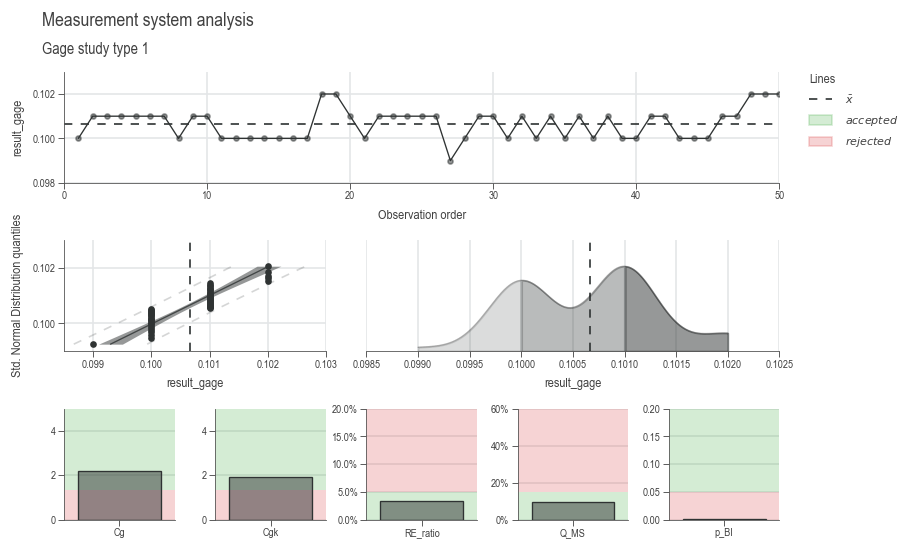

In [7]:
import daspi as dsp
df = dsp.load_dataset('grnr_layer_thickness')
gage = dsp.GageStudyModel(
    source=df,
    target='result_gage',
    reference='reference',
    u_cal=df['U_cal'][0],
    tolerance=df['tolerance'][0],
    resolution=df['resolution'][0],)
chart = dsp.GageStudyCharts(
        gage, stretch_figsize=1.3
    ).plot(
    ).stripes(
    ).label(
    ) # .save('path/to/file.png')
gage # or print(repr(gage))

In [10]:
import numpy as np
import pandas as pd
import daspi as dsp

from pathlib import Path

valid_data_dir = Path.cwd()/'tests'/'data'
df_lin = pd.read_csv(
    valid_data_dir/'gage_study.csv', skiprows=54, nrows=30, sep=';')
df_single = pd.read_csv(
    valid_data_dir/'gage_study.csv', skiprows=1, nrows=50, sep=';')

gage_single = dsp.GageStudyModel(
    source=df_single,
    target='result',
    reference='reference',
    u_cal=df_single['U_cal'][0],
    tolerance=df_single['tolerance'][0],
    resolution=df_single['resolution'][0],
    k=2)

gage_lin = dsp.GageStudyModel(
    source=df_lin,
    target='result',
    reference='reference',
    u_cal=df_lin['U_cal'][0],
    tolerance=df_lin['tolerance'][0],
    resolution=df_lin['resolution'][0],
    bias_corrected=True,
    k=2)
gage_lin

Reference analysis:
    Ref     mean    Bias         s      R
1   0.0  -0.4948 -0.4948  1.887210  4.155
2   5.0   1.9276 -3.0724  1.050148  2.669
3  10.0   5.4498 -4.5502  1.076111  2.852
4  15.0  17.3020  2.3020  1.906764  4.613
5  20.0  22.5066  2.5066  1.280707  3.408
6  30.0  23.0642 -6.9358  1.477881  3.243

Gage capability:
             Value  Limit  Capable       T_min
Cg        0.396019   1.33    False   84.146022
Cgk       0.204301   1.33    False  101.220356
RE_ratio  0.000033   0.05     True    0.020000
Q_MS      1.251310   0.15    False  250.261976
p_BI      0.019680   0.05    False         NaN

Measurement uncertainty budget measuring process:
             u          U         Q  rank
CAL   0.050000   0.100000  0.006667   3.0
RE    0.000289   0.000577  0.000038   4.0
BI    0.000000   0.000000  0.000000   NaN
LIN   9.265996  18.531991  1.235466   1.0
EVR   1.487866   2.975733  0.198382   2.0
REST  0.000000   0.000000  0.000000   NaN
MS    9.384824  18.769648  1.251310   NaN

C:\Users\ch0rjg\Festo\FMT-Product Care Versuch - Documents\Datenwissenschaft\Bibliotheken\DaSPi\daspi\statistics\estimation.py:582: UserWarning: NaN values found in the samples. These will be omitted from the analysis.
  warnings.warn(
C:\Users\ch0rjg\Festo\FMT-Product Care Versuch - Documents\Datenwissenschaft\Bibliotheken\DaSPi\daspi\statistics\estimation.py:582: UserWarning: NaN values found in the samples. These will be omitted from the analysis.
  warnings.warn(


Model summary:
   hierarchical least_parameter  p_least         s         aic        r2  \
0          True        operator  0.54296  0.000821 -671.752762  0.980053   

     r2_adj   r2_pred  
0  0.975482  0.968833  

Analysis of variance:
Typ-I     DF            SS            MS           F             p        n2
Source                                                                      
part       9  1.587817e-03  1.764241e-04  261.907904  1.183467e-37  0.979539
operator   2  8.333333e-07  4.166667e-07    0.618557  5.429598e-01  0.000514
Residual  48  3.233333e-05  6.736111e-07         NaN           NaN  0.019947

Repeatability and reproducibility (R&R):
                 MS  MS/Total         s        6s  6s/Total  6s/Tolerance
R&R    6.736111e-07   0.02248  0.000821  0.004924  0.149932      0.164148
EV     6.736111e-07   0.02248  0.000821  0.004924  0.149932      0.164148
AV     0.000000e+00   0.00000  0.000000  0.000000  0.000000      0.000000
PV     2.929174e-05   0.97752  0.005412  0.032473  0.988696      1.082437
Total  2.996535e-05   1.00000  0.005474  0.032844  1.000000      1.094812

Measurement uncertainty budget measuring system:
                u         U         Q  rank
CAL      0.000100  0.000200  0.013333   5.0
RE       0.000289  0.000577  0.038490   3.0
BI       0.000196  0.000393  0.026173   4.0
LIN      0.000000  0.000000  0.000000   NaN
EVR      0.000688  0.001377  0.091785   2.0
MS_REST  0.000000  0.000000  0.000000   NaN
MS       0.000723  0.001446  0.096371   NaN

Measurement uncertainty budget measuring process:
                u         U         Q  rank
EVO      0.000821  0.001641  0.109432   1.0
AV       0.000000  0.000000  0.000000   NaN
GV       0.000000  0.000000  0.000000   NaN
IA       0.000000  0.000000  0.000000   NaN
T        0.000000  0.000000  0.000000   NaN
STAB     0.000000  0.000000  0.000000   NaN
OBJ      0.000000  0.000000  0.000000   NaN
MP_REST  0.000000  0.000000  0.000000   NaN
MP       0.000850  0.001700  0.113305   NaN

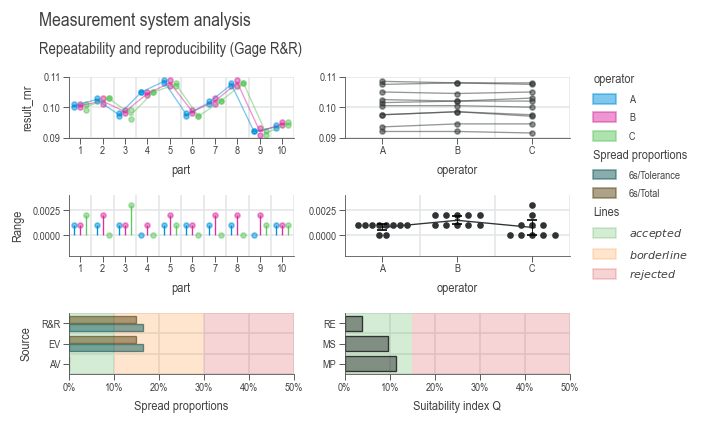

In [12]:
import daspi as dsp
df = dsp.load_dataset('grnr_layer_thickness')
gage = dsp.GageStudyModel(
    source=df,
    target='result_gage',
    reference='reference',
    u_cal=df['U_cal'][0],
    tolerance=df['tolerance'][0],
    resolution=df['resolution'][0],)

rnr_model = dsp.GageRnRModel(
    source=df,
    target='result_rnr',
    part='part',
    u_av='operator',
    gage=gage)
chart = dsp.GageRnRCharts(rnr_model).plot().stripes().label()
rnr_model

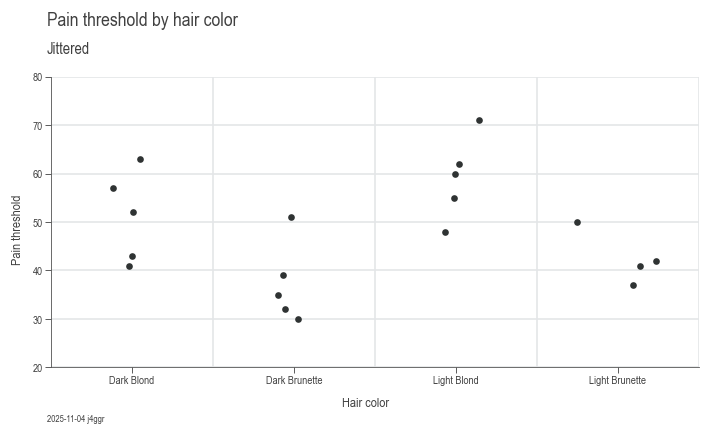

In [13]:
import daspi as dsp

df = dsp.load_dataset('anova')
chart = dsp.SingleChart(
        source=df,
        target='Pain threshold',
        feature='Hair color',
        categorical_feature=True,
    ).plot(
        dsp.Jitter
    ).label(
        fig_title='Pain threshold by hair color',
        sub_title='Jittered',
        feature_label=True,
        target_label=True,
        info=True
    )

chart.save('./docs/img/anova_jitter_pain-color.png', dpi=DPI)

In [14]:
model = dsp.LinearModel(df, 'Pain threshold', ['Hair color'])
model

formula:
Pain threshold ~ 51.2000 - 13.8000*Hair color[T.Dark Brunette] + 8.0000*Hair color[T.Light Blond] - 8.7000*Hair color[T.Light Brunette]

Model summary:
   hierarchical least_parameter   p_least         s         aic        r2  \
0          True      Hair color  0.004114  8.172311  137.256843  0.575962   

     r2_adj   r2_pred  
0  0.491155  0.329331  

Parameter statistics:
                              coef   std err          t             p  \
Intercept                     51.2  3.654769  14.009095  5.074075e-10   
Hair color[T.Dark Brunette]  -13.8  5.168623  -2.669957  1.747971e-02   
Hair color[T.Light Blond]      8.0  5.168623   1.547801  1.425066e-01   
Hair color[T.Light Brunette]  -8.7  5.482153  -1.586968  1.333718e-01   

                                 ci_low     ci_upp  
Intercept                     43.410045  58.989955  
Hair color[T.Dark Brunette]  -24.816660  -2.783340  
Hair color[T.Light Blond]     -3.016660  19.016660  
Hair color[T.Light Brunette] -20.384932   2.984932  

Analysis of variance:
Typ-I       DF           SS          MS         F         p        n2
Source                                                               
Hair color   3  1360.726316  453.575439  6.791407  0.004114  0.575962
Residual    15  1001.800000   66.786667       NaN       NaN  0.424038

Variance inflation factor:
            DF  VIF GVIF  Threshold  Collinear               Method
Intercept    1  4.0  2.0   2.236068      False            R_squared
Hair color   3  1.0  1.0   1.307660      False  single_order-1_term

In [15]:
x_bar_group = df.groupby('Hair color')['Pain threshold'].mean()
x_bar = df['Pain threshold'].mean()
(x_bar_group - x_bar).abs()

Hair color
Dark Blond         3.357895
Dark Brunette     10.442105
Light Blond       11.357895
Light Brunette     5.342105
Name: Pain threshold, dtype: float64

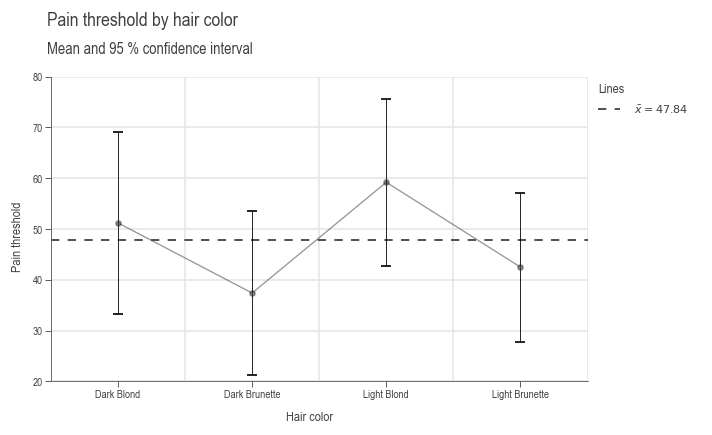

In [16]:
LEVEL = 0.95
n_groups = df.groupby(['Hair color']).ngroups
chart = dsp.SingleChart(
        source=df,
        target='Pain threshold',
        feature='Hair color',
        categorical_feature=True,
    ).plot(
        dsp.MeanTest,
        n_groups=n_groups,
        confidence_level=LEVEL,
        show_center=False
    ).plot(
        dsp.CenterLocation
    ).stripes(
        mean=True
    ).label(
        fig_title='Pain threshold by hair color',
        sub_title=f'Mean and {int(100*LEVEL)} % confidence interval',
        feature_label=True,
        target_label=True,
    )

chart.save('./docs/img/anova_mean-ci_pain-color.png', dpi=DPI)

In [17]:
model.uncertainty

8.172310974667244

C:\Users\ch0rjg\Festo\FMT-Product Care Versuch - Documents\Datenwissenschaft\Bibliotheken\DaSPi\daspi\statistics\estimation.py:582: UserWarning: NaN values found in the samples. These will be omitted from the analysis.
  warnings.warn(


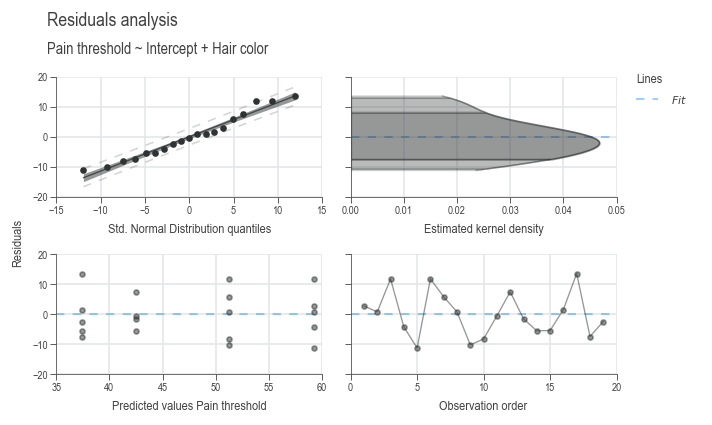

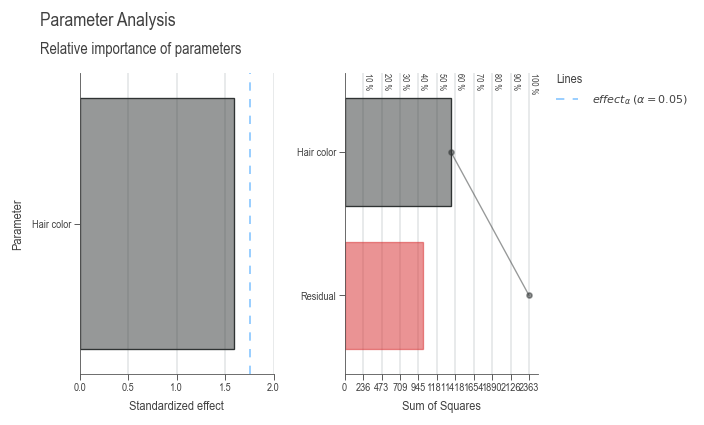

In [18]:
chart_r = dsp.ResidualsCharts(model).plot().stripes().label()
chart_p = dsp.ParameterRelevanceCharts(model).plot().stripes().label()

chart_r.save('./docs/img/anova_residues_pain-color.png', dpi=DPI)
chart_p.save('./docs/img/anova_parameter-relevance_pain-color.png', dpi=DPI)
